# Handwritten Digits Recognition

This project of Handwritten Digits Recognition aims to create and train a model using Deep Learning Approach, especially Computer Vision, based on CNN (Convolutional Neural Networks).

To get started, we want to import important packages, such as **Tensorflow**, in order to well-train our model.

In [1]:
import tensorflow as tf

Next, we load the **MNIST handwritten digits dataset**, that tensorflow contains it, which can be loaded using Keras. The MNIST handwritten digits dataset contains **60 000 training examples**, and **10 000 testing examples**.

After loading our MNIST dataset, we should divide it into **train and test datasets**.

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

We'll import other important packages, such as **Matplotlib** for plotting, in order to visualize the first image of the training dataset. This helps us understand the nature of the data we are working with.

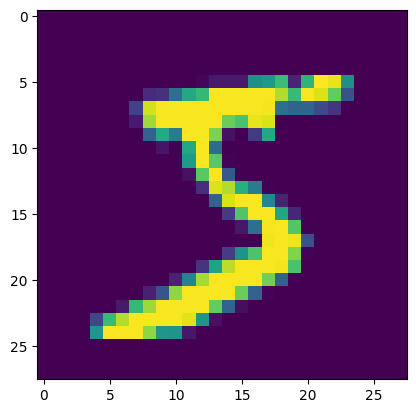

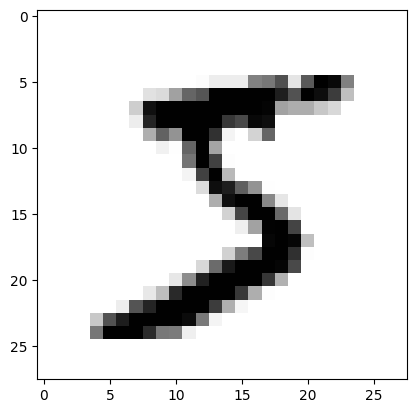

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)

Now, we will check the values of each pixel before normalization.

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

We proceed, at next, to normalize the data by starting with the pre-processing step.

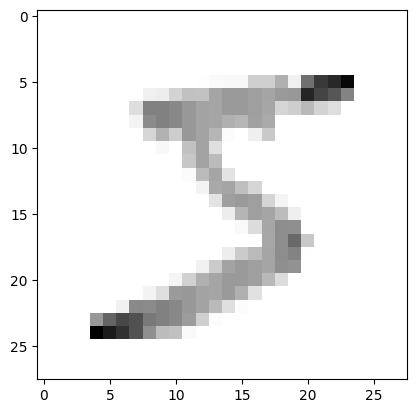

In [8]:
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize (x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

Now, we will check the values of each pixel after normalization.

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


In this step, we will resize the image, because it will be so important to do that in order to make it suitable for applying **Convolution Operation**.

In [11]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training samples dimension: ", x_trainr.shape)
print("Test samples dimension: ", x_testr.shape)

Training samples dimension:  (60000, 28, 28, 1)
Test samples dimension:  (10000, 28, 28, 1)


Now, we'll create a **Deep Neural Network**, in order to train on 60 000 samples of our MNIST handwritten dataset.

In [12]:
# import new packages from tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# create a new neural network
model = Sequential()

# create first convolutional layer
# only for first convolutional layer to mention input layer size
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
# declare the activation function
model.add(Activation("relu"))
# Maxpooling
model.add(MaxPooling2D(pool_size = (2,2)))

# create second convolutional layer
model.add(Conv2D(64, (3,3)))
# declare the activation function
model.add(Activation("relu"))
# Maxpooling
model.add(MaxPooling2D(pool_size = (2,2)))

# create third convolutional layer
model.add(Conv2D(64, (3,3)))
# declare the activation function
model.add(Activation("relu"))
# Maxpooling
model.add(MaxPooling2D(pool_size = (2,2)))

# create first fully connected layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# create second fully connected layer
model.add(Dense(32))
model.add(Activation("softmax"))

# create last fully connected layer
model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
print("Total Training Samples: ", len(x_trainr))

Total Training Samples:  60000


In [15]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [16]:
model.fit(x_trainr, y_train, epochs = 5, validation_split = 0.3) # Training model

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 71s 52ms/step - accuracy: 0.3497 - loss: 1.9471 - val_accuracy: 0.4088 - val_loss: 1.4044
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 85s 55ms/step - accuracy: 0.4242 - loss: 1.3422 - val_accuracy: 0.4309 - val_loss: 1.1911
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 78s 52ms/step - accuracy: 0.4835 - loss: 1.1587 - val_accuracy: 0.5291 - val_loss: 1.0529
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.5509 - loss: 1.0207 - val_accuracy: 0.5952 - val_loss: 0.9485
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 85s 55ms/step - accuracy: 0.6613 - loss: 0.8572 - val_accuracy: 0.7246 - val_loss: 0.7001


In [17]:
# Evaluating on testing dataset of MNIST
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10 000 test samples: ", test_loss)
print("Validation Accuracy on 10 000 test samples: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7301 - loss: 0.7054
Test loss on 10 000 test samples:  0.6944000720977783
Validation Accuracy on 10 000 test samples:  0.7325999736785889


In [18]:
predictions = model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [19]:
print(predictions)

[[9.1078761e-04 3.2384915e-04 1.2701581e-01 ... 8.6200315e-01
  1.0352924e-03 2.1001983e-03]
 [1.0466174e-02 8.2356364e-02 6.8149722e-01 ... 1.0903743e-01
  9.4861006e-03 1.0663109e-02]
 [2.1901743e-03 5.0287348e-01 6.6108078e-02 ... 1.8542647e-04
  1.5960913e-03 9.2946598e-04]
 ...
 [8.9149617e-02 8.7695144e-04 1.3728251e-03 ... 1.1328580e-03
  1.1152659e-03 1.1299731e-01]
 [6.9705099e-02 3.9446554e-03 5.3622983e-03 ... 4.4673760e-03
  1.6322775e-02 3.0120739e-01]
 [2.9166872e-03 4.9203661e-01 7.0116162e-02 ... 2.3999521e-04
  1.9289536e-03 1.1927937e-03]]


In [20]:
print(np.argmax(predictions[0]))

7


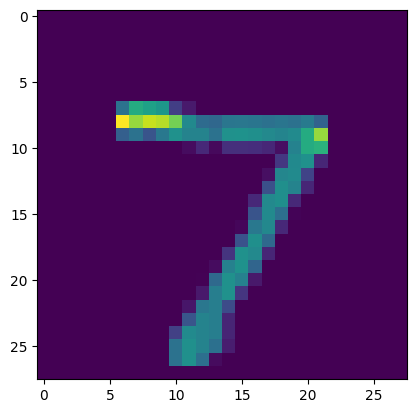

In [21]:
plt.imshow(x_test[0])

In [26]:
import cv2

img = cv2.imread('seven.png')

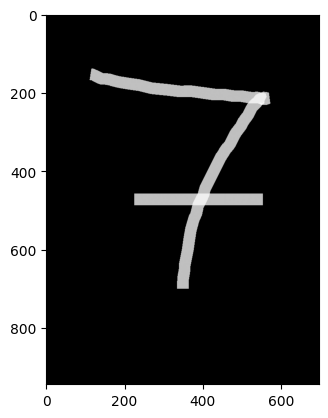

In [27]:
plt.imshow(img)

In [31]:
img.shape

(944, 696, 3)

In [32]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [33]:
gray.shape

(944, 696)

In [34]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [35]:
resized.shape

(28, 28)

In [36]:
newimg = tf.keras.utils.normalize(resized, axis = 1) # 0 to 1 scaling

In [37]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # kernel operation of convolution layer

In [38]:
newimg.shape

(1, 28, 28, 1)

In [39]:
predictions = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


In [40]:
print(np.argmax(predictions))

7
